# 从features.txt读取特征

In [1]:
import numpy as np
import pandas as pd

# get features from the file features.txt
features = list()
with open('UCI HAR Dataset/features.txt') as f:
    features = [line.split()[1] for line in f.readlines()]
print('Num of Features: {}'.format(len(features)))


Num of Features: 561


## 读取train数据 & 预览

In [2]:
# get the data from txt files to pandas dataffame
# pd.read_csv() - "names" is a LIST which serves as header for the columns
X_train = pd.read_csv('UCI HAR dataset/train/X_train.txt', delim_whitespace=True, header=None, names=features)

# add subject column to the dataframe
X_train['subject'] = pd.read_csv('UCI HAR dataset/train/subject_train.txt', header=None, squeeze=True)

y_train = pd.read_csv('UCI HAR dataset/train/y_train.txt', names=['Activity'], squeeze=True)
y_train_labels = y_train.map({1: 'WALKING', 2:'WALKING_UPSTAIRS',3:'WALKING_DOWNSTAIRS',\
                       4:'SITTING', 5:'STANDING',6:'LAYING'})

# put all columns in a single dataframe
train = X_train
train['Activity'] = y_train
train['ActivityName'] = y_train_labels
train.sample(5)

D:\Python\lib\site-packages\pandas\io\parsers.py:702: UserWarning: Duplicate names specified. This will raise an error in the future.
  return _read(filepath_or_buffer, kwds)


,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject,Activity,ActivityName
3593,0.425789,-0.003028,-0.133813,0.000249,0.075415,-0.347596,-0.052669,0.058458,-0.364065,0.002285,...,-0.601919,-0.029923,0.613688,0.681670,-0.551202,0.370543,0.164121,17,2,WALKING_UPSTAIRS
1164,0.277184,-0.020976,-0.103713,-0.984661,-0.920622,-0.959196,-0.986908,-0.918233,-0.957391,-0.918925,...,-0.047524,0.132101,-0.606646,-0.050803,-0.835770,0.210499,0.034860,6,5,STANDING
2380,0.281960,-0.029525,0.002162,-0.300699,0.122331,0.611601,-0.336616,0.117050,0.596454,-0.124361,...,0.258418,-0.867018,0.973123,-0.397219,-0.404084,0.314413,0.369649,14,2,WALKING_UPSTAIRS
6825,0.276424,-0.020018,-0.108249,-0.997327,-0.985547,-0.992947,-0.997994,-0.985305,-0.991706,-0.942944,...,0.045821,-0.810671,0.518529,-0.572708,-0.906661,0.162460,0.024293,29,5,STANDING
5325,0.270139,0.030767,-0.077899,-0.995295,-0.864718,-0.930125,-0.996109,-0.844888,-0.931546,-0.941077,...,0.014062,-0.027881,0.364114,-0.247777,-0.943771,0.057559,0.031309,25,4,SITTING


## 读取test数据 & 预览

In [3]:
# get the data from txt files to pandas dataffame
X_test = pd.read_csv('UCI HAR dataset/test/X_test.txt', delim_whitespace=True, header=None, names=features)

# add subject column to the dataframe
X_test['subject'] = pd.read_csv('UCI HAR dataset/test/subject_test.txt', header=None, squeeze=True)

# get y labels from the txt file
y_test = pd.read_csv('UCI HAR dataset/test/y_test.txt', names=['Activity'], squeeze=True)
y_test_labels = y_test.map({1: 'WALKING', 2:'WALKING_UPSTAIRS',3:'WALKING_DOWNSTAIRS',\
                       4:'SITTING', 5:'STANDING',6:'LAYING'})


# put all columns in a single dataframe
test = X_test
test['Activity'] = y_test
test['ActivityName'] = y_test_labels
test.sample(5)

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject,Activity,ActivityName
1161,0.185820,-0.020255,-0.102457,0.314550,-0.290497,-0.174607,0.218373,-0.315738,-0.207341,0.635052,...,0.892676,0.532599,-0.052193,-0.415475,-0.907519,0.065349,-0.042585,10,3,WALKING_DOWNSTAIRS
207,0.288927,-0.016271,-0.111948,-0.994213,-0.987161,-0.990619,-0.994966,-0.988089,-0.992019,-0.936195,...,0.111094,-0.514280,0.539674,-0.392323,0.583564,-0.497991,-0.509191,2,6,LAYING
374,0.283695,-0.017367,-0.113113,-0.987410,-0.990953,-0.976705,-0.988193,-0.990285,-0.979274,-0.930215,...,0.253794,0.843275,0.074422,-0.082865,0.567953,-0.690850,-0.308228,4,6,LAYING
2542,0.242932,-0.017346,-0.160880,-0.086651,0.348458,-0.224892,-0.166818,0.421767,-0.235293,0.216959,...,0.229744,-0.825444,-0.961149,0.006384,-0.545412,0.412123,0.016589,20,2,WALKING_UPSTAIRS
1461,0.361385,-0.017114,-0.095239,-0.048903,-0.091806,-0.554487,-0.113523,-0.114862,-0.557210,0.375966,...,-0.811638,-0.303600,0.200862,-0.897583,-0.877475,0.181068,0.036158,12,1,WALKING


# 数据清洗

## 唯一性检验

In [4]:
print('No of duplicates in train: {}'.format(sum(train.duplicated())))
print('No of duplicates in test : {}'.format(sum(test.duplicated())))

No of duplicates in train: 0
No of duplicates in test : 0


## 连续性检验

In [5]:
print('We have {} NaN/Null values in train'.format(train.isnull().values.sum()))
print('We have {} NaN/Null values in test'.format(test.isnull().values.sum()))

We have 0 NaN/Null values in train
We have 0 NaN/Null values in test


## 平衡性检验

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('whitegrid')
plt.rcParams['font.family'] = 'Dejavu Sans'

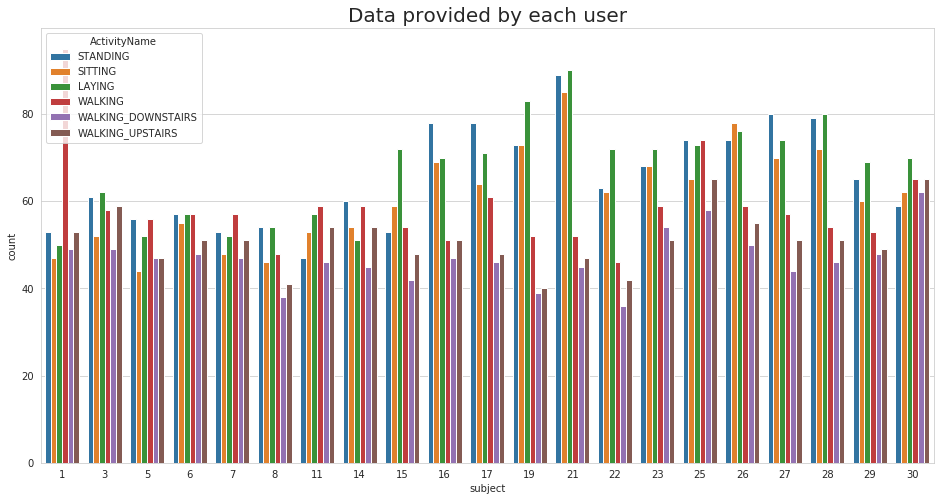

In [7]:
plt.figure(figsize=(16,8))
plt.title('Data provided by each user', fontsize=20)
sns.countplot(x='subject',hue='ActivityName', data = train)
plt.show()


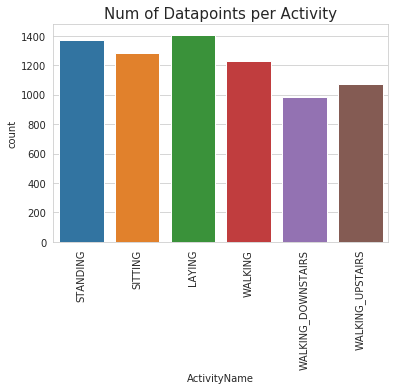

In [8]:
plt.title('Num of Datapoints per Activity', fontsize=15)
sns.countplot(train.ActivityName)
plt.xticks(rotation=90)
plt.show()

### Observation：由上图，所有用户提供的数据量基本相等

## 修改特征命名格式

In [9]:
columns = train.columns

# Removing '()' from column names
columns = columns.str.replace('[()]','')
columns = columns.str.replace('[-]', '')
columns = columns.str.replace('[,]','')

train.columns = columns
test.columns = columns

test.columns

Index(['tBodyAccmeanX', 'tBodyAccmeanY', 'tBodyAccmeanZ', 'tBodyAccstdX',
       'tBodyAccstdY', 'tBodyAccstdZ', 'tBodyAccmadX', 'tBodyAccmadY',
       'tBodyAccmadZ', 'tBodyAccmaxX',
       ...
       'angletBodyAccMeangravity', 'angletBodyAccJerkMeangravityMean',
       'angletBodyGyroMeangravityMean', 'angletBodyGyroJerkMeangravityMean',
       'angleXgravityMean', 'angleYgravityMean', 'angleZgravityMean',
       'subject', 'Activity', 'ActivityName'],
      dtype='object', length=564)

## 数据另存为 .csv

In [10]:
train.to_csv('UCI HAR Dataset/csv files/train.csv', index=False)
test.to_csv('UCI HAR Dataset/csv files/test.csv', index=False)